# Hackathon Dev

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

from westworld.environment import GridEnvironment
from westworld.agents import BaseAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation import Simulation
from westworld.colors import *

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Playground

- Multi agent
- 5 agents par joueur
- Carte générée aléatoirement, avec des labyrinthe
- Les agents doivent ramasser des pièces
- Plus ils ramassent des pièces plus ils sont forts
- Quand ils attaquent un joueur la.probabilite de gagner est en fonction des pièces ramassées
- Des agents peuvent bloquer défensivement pour empêcher l'ennemi d'aller chercher des pièces
- Les agents peuvent se mettre dans des nids pour se reproduire

In [3]:
from westworld.examples.games.hackathon import BasePlayer,Obstacle,Gold,ReproductionTrigger,GameEnvironment

In [6]:
class Player(BasePlayer):
    
    def action(self):
#         if self.reproductor:
#             # Find closest food
#             targets = self.find_closest(name = "ReproductionTrigger",active = True,k = 1)
            
#             # If there is still food, move towards the food
#             if len(targets) > 0:

#                 target = targets[0]

#                 # Use naive pathfinding for faster computation as there is no obstacle
#                 self.move_towards(obj = target,naive = True)

#             # Otherwise just wandering
#             # Changing direction every n steps where n = curiosity
#             else:
#                 self.wander() 
            
#         else:

            # Find closest food
            targets = self.find_closest(name = "Gold",k = 1)

            # If there is still food, move towards the food
            if len(targets) > 0:

                target = targets[0]

                # Use naive pathfinding for faster computation as there is no obstacle
                self.move_towards(obj = target,naive = True)

            # Otherwise just wandering
            # Changing direction every n steps where n = curiosity
            else:
                self.wander()
                

In [9]:
class Player(BasePlayer):
    
    def action(self):

        # Find closest food
        targets = self.find_closest(name = "Gold",k = 1)

        # If there is still food, move towards the food
        if len(targets) > 0:

            target = targets[0]

            # Use naive pathfinding for faster computation as there is no obstacle
            self.move_towards(obj = target,naive = True)

        # Otherwise just wandering
        # Changing direction every n steps where n = curiosity
        else:
            self.wander()



##### Preparing environment and simulation

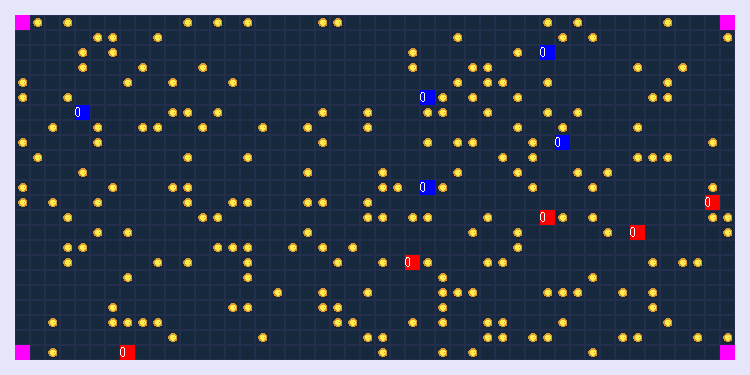

In [10]:
WIDTH = 50
HEIGHT = 25
N_PLAYERS = 5

# Setup spawners
player1_spawner = lambda x,y : Player(x,y,player1 = True)
player2_spawner = lambda x,y : Player(x,y,player1 = False)
reproduction_spawner = lambda x,y : ReproductionTrigger(x,y)
obstacle_spawner = lambda x,y,width,height : BaseObstacle(x,y,width,height,color = (230, 230, 250))

triggers = [
    reproduction_spawner(1,1),
    reproduction_spawner(WIDTH-2,1),
    reproduction_spawner(1,HEIGHT-2),
    reproduction_spawner(WIDTH-2,HEIGHT-2),
]

obstacles = [
    obstacle_spawner(0,0,WIDTH,1), # Top contour
    obstacle_spawner(0,0,1,HEIGHT), # Left contour
    obstacle_spawner(WIDTH-1,0,1,HEIGHT), # Right contour 
    obstacle_spawner(0,HEIGHT-1,WIDTH,1), # Bottom contour
] 



# Setup environment
env = GameEnvironment(WIDTH,HEIGHT,player1_spawner,player2_spawner,obstacles = obstacles,triggers = triggers)

# Render
env.render()
env.get_img()

In [12]:
# Setup simulation
sim = Simulation(env,fps = 100,name="RabbitsVsFoxesExperiment1")
_,episode_data = sim.run_episode(n_steps = 500,save = False,replay = True,fps_replay=25)

  0%|          | 0/500 [00:00<?, ?it/s]

error: display Surface quit

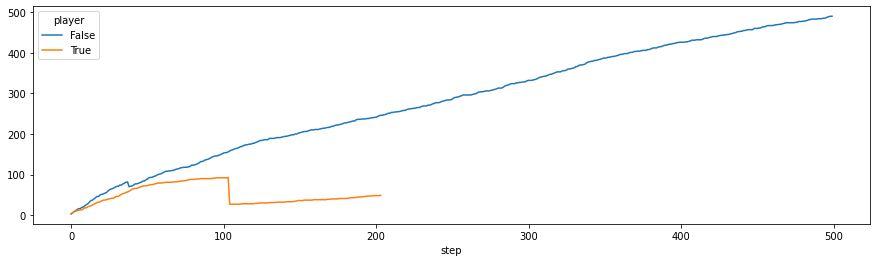

In [13]:
episode_data.groupby(["step","player"])["gold"].sum().unstack("player").plot(figsize = (15,4))
plt.show()